In [1]:
import tables, glob, os, time, sys
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.colors as colors
from scipy.stats import norm

from stl import mesh
from mpl_toolkits import mplot3d
import scipy.constants as con

In [2]:
def ReadFile(Keys, File): 
    if not os.path.isfile(File):
        print('no')
        return
    else: 
        Data = {}
        try:
            with tables.open_file(File, mode="r") as f: 
                for Key in Keys:    
                    data = f.root._f_get_child(Key)._f_get_child(Key).read()
                    if data is None:
                        print(data)
                    Data[Key] = data
            if Data is None: 
                print(Data)
            return(Data)
        except:
            return 

In [3]:
def GetPhotonFlags(Flags):
    PhotonFlags = {}
    PhotonFlags['NO_HIT'] = (Flags & (0x1 << 0)).astype(bool)   
    PhotonFlags['BULK_ABSORB'] = (Flags & (0x1 << 1)).astype(bool)   
    PhotonFlags['SURFACE_DETECT'] = (Flags & (0x1 << 2)).astype(bool)   
    PhotonFlags['SURFACE_ABSORB'] = (Flags & (0x1 << 3)).astype(bool)   
    PhotonFlags['RAYLEIGH_SCATTER'] = (Flags & (0x1 << 4)).astype(bool)   
    PhotonFlags['REFLECT_DIFFUSE'] = (Flags & (0x1 << 5)).astype(bool)   
    PhotonFlags['REFLECT_SPECULAR'] = (Flags & (0x1 << 6)).astype(bool)    
    PhotonFlags['SURFACE_REEMIT'] = (Flags & (0x1 << 7)).astype(bool)    
    PhotonFlags['SURFACE_TRANSMIT'] = (Flags & (0x1 << 8)).astype(bool)    
    PhotonFlags['BULK_REEMIT'] = (Flags & (0x1 << 9)).astype(bool)   
    PhotonFlags['MATERIAL_REFL'] = (Flags & (0x1 << 10)).astype(bool)  
    PhotonFlags['NAN_ABORT'] = (Flags & (0x1 << 31)).astype(bool)  
    return PhotonFlags

In [23]:
allKeys = ['NumDetected', 'ChannelCharges', 'ChannelIDs', 'NumHitChannels', 
                  'IncidentAngles', 'Flags', 'LastHitTriangle', 'FinalPosition', 'InitialPosition', 'DetectedPos', 
                  'PhotonWavelength', 'DetectorHit', 'PhotonTime']

File1 = "h5_files/chroma_nEXO_OD_OD_fullAbs_WT_18_210726_105550_r2172.h5"
File2 = "h5_files/chroma_nEXO_OD_OD_fullAbs_WT_18_210726_105550_r3275.h5"
File3 = "h5_files/chroma_nEXO_OD_OD_fullAbs_WT_18_210726_105550_r5066.h5"

Data1 = ReadFile(allKeys, File1)
Data2 = ReadFile(allKeys, File2)
Data3 = ReadFile(allKeys, File3)

AllData = [Data1, Data2, Data3]

In [27]:
print(Data1.keys())


dict_keys(['NumDetected', 'ChannelCharges', 'ChannelIDs', 'NumHitChannels', 'IncidentAngles', 'Flags', 'LastHitTriangle', 'FinalPosition', 'InitialPosition', 'DetectedPos', 'PhotonWavelength', 'DetectorHit', 'PhotonTime'])


In [22]:
# print(Data1['NumDetected']

for D in AllData:
      #print("total number created:", len(D['PhotonWavelength']), ", total number detected:", np.sum(D['NumDetected']), 
       #     ", efficency:", np.sum(D['NumDetected'])/len(D['PhotonWavelength'])*100 )
    print(D['PhotonWavelength'][:5])

[546.087   473.51172 530.5351  476.62207 377.0903 ]
[442.40802 363.61203 556.45483 291.0368  514.9833 ]
[334.58194 317.99332 500.46823 352.20737 337.69232]


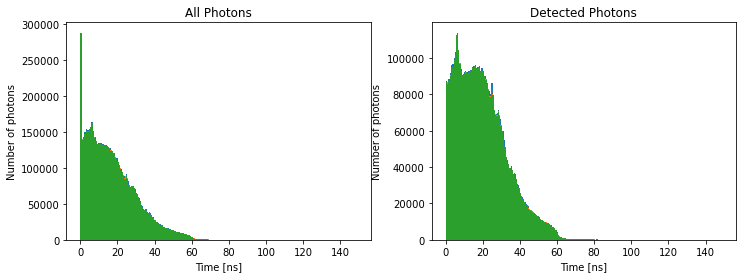

In [11]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

for D in AllData:
    PhotonTiming = D['PhotonTime'] 
    PhotonFlags_flip = GetPhotonFlags(D['Flags'])
    HitTimes_detect = PhotonTiming[PhotonFlags_flip['SURFACE_DETECT']]

    axs[0].hist(PhotonTiming, bins=200)
    axs[1].hist(HitTimes_detect, bins=200)
    
axs[0].set_xlabel("Time [ns]")
axs[0].set_ylabel("Number of photons")
axs[0].set_title("All Photons")

axs[1].set_xlabel("Time [ns]")
axs[1].set_ylabel("Number of photons")
axs[1].set_title("Detected Photons")
plt.show()